

# Project: TMDb Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I decided to select the TMDb (The Movies Database) data in order to complete my second project of "Udacity Data Analyst Nanodegree program".

Dataset contains information about 10 thousand movies collected from The Movie Database (TMDb).

**Important Note:**  
- When i was searching, i came across with similar projects which were completed by different persons. 
- There were 5 different projects which are defined by Udacity Nanodegree Analyst Program.  
- I made a double check in order to ask different questions and create different codes to seperate my analysis and written codes.  
- I will suggest Udacity team in order to give us more different projects or giving different project datas for every different course.

**Questions that i plan on exploring over the project from this dataset**

1. Best movie which has highest profit
2. Worst movie which has lowest profit
3. Movies which have largest and lowest budgets
4. Movies which have high and low earned revenues
5. Movies which are longest and shortest runtime values
6. Average runtime of all the movies

---------------

7. Successful genres
8. Best 5 Casts & Actors
9. Average profit
10. Average duration of the movies

In [215]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Regarding observation of the dataset and proposed questions, I will be keeping only relevant data after deleting the unused values.  
After these steps, i will be able to make the analysis easy and correctly.

### General Properties

In [216]:
#loading the csv file
tmdb_df = pd.read_csv ('tmdb-movies.csv')
tmdb_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [217]:
# checking data types
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [218]:
# checking data shape 
tmdb_df.shape

(10866, 21)

In [219]:
#checking missing data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Obsevations from the data set**

1. There is no currency information. I will use the currency as USD.

2. There are some missing datas in our database such as imdb_id, cast, homepage, director, tagline, keywords, overview and others which you can find them above (tmdb_df.info()). Missing datas will not affect our analysis regarding defined questions and search criteria.

### Data Cleaning (Removing the unused information from the dataset)

**Important observation regarding this process**

1. Removing unnecessary columns
2. Removing the duplicated rows
3. Some movies in the database have zero budget or zero revenue, these values have not been recorded so i will be discarding such entries in order to make a correct analysis regarding to our defined questions. 
4. Changing release date column into date format.
5. Replacing "zero" with NAN in runtime column.
6. Changing format of budget and revenue column.

**1. Removing unnecessary columns**

Columns which i selected to delete are;  

id  
imdb_id  
popularity  
budget_adj  
revenue_adj  
homepage  
keywords  
overview  
production_companies  
vote_count  
vote_average

In [220]:
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
tmdb_df=tmdb_df.drop(del_col,1)

#previewing the new dataset
tmdb_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


**2. Removing the duplicated rows**  

I will check the dublicated rows if data includes.

In [221]:
rows, col = tmdb_df.shape
tmdb_df.shape

(10866, 10)

Let's have a look to duplicated rows and remove them.

In [222]:
tmdb_df.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_df.shape
tmdb_df.shape

(10865, 10)

I found one duplicated row in data and removed.

**3. Removing zero budget and zero revenue**

In [223]:
#creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#replace all the value from 'zero' to NAN in the list
tmdb_df[temp_list] = tmdb_df[temp_list].replace(0, np.NAN)

#Removing the rows which have NaN value in temp_list 
tmdb_df.dropna(subset = temp_list, inplace = True)
tmdb_df.shape

(3854, 10)

**4. Changing release date column into date format**

In [224]:
tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])

In [225]:
# printing new dataset
tmdb_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


**5. Replacing "zero" with NAN in runtime column**

In [226]:
#replacing 'zero' with NaN of runtime column in the dataset
tmdb_df['runtime'] =tmdb_df['runtime'].replace(0, np.NAN)

**6. Changing format of budget and revenue column**

In [227]:
tmdb_df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [228]:
change_type=['budget', 'revenue']
#changing data type
tmdb_df[change_type]=tmdb_df[change_type].applymap(np.int64)
#printing the changed information
tmdb_df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [229]:
tmdb_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis

**1. Calculating the profit of the each movie**

In [230]:
#insert function with three parameters
tmdb_df.insert(2,'profit',tmdb_df['revenue']-tmdb_df['budget'])

#previewing the changes in the dataset
tmdb_df.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


### Question 1 : Best movie which has highest profit

In [231]:
import pprint
#definition of function
def calculate(column):
    #for highest earned profit
    high= tmdb_df[column].idxmax()
    high_values=pd.DataFrame(tmdb_df.loc[high])
    
    #highest profit
    info=pd.concat([high_values], axis=1)
    
    return info

#calling the function
calculate('profit')

,1386
budget,237000000
revenue,2781505847
profit,2544505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00


Column with id 1386 shows that Avatar movie has the highest earned profit.

### Question 2 : Worst movie which has lowest profit

In [232]:
import pprint
#definition of function
def calculate(column):
    
    #for lowest earned profit
    low= tmdb_df[column].idxmin()
    low_details=pd.DataFrame(tmdb_df.loc[low])
    
    #lowest profit
    info=pd.concat([low_details], axis=1)
    
    return info

#calling the function
calculate('profit')

,2244
budget,425000000
revenue,11087569
profit,-413912431
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
release_date,2010-12-02 00:00:00


Column with id 2244 shows that he Warrior's Way movie has the lowest earned profit.

### Question 3 : Movies which have largest and lowest budgets

In [233]:
import pprint
#definition of function
def calculate(column):
    #for highest earned budget
    high= tmdb_df[column].idxmax()
    high_values=pd.DataFrame(tmdb_df.loc[high])
    
    #for lowest earned budget
    low= tmdb_df[column].idxmin()
    low_values=pd.DataFrame(tmdb_df.loc[low])
    
    #highest and lowest budget
    info=pd.concat([high_values, low_values], axis=1)
    
    return info

calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


The Warrior's Way movie has largest budget.  
Lost & Found movie has lowest budget. 

### Question 4 : Movies which have high and low earned revenues

In [234]:
# lets call the same function **calculate(column)**
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Avatar movie has the largest revenue.   
Shattered movie has the smallest revenue.

### Question 5 : Movies which are longest and shortest runtime values

In [235]:
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


Carlos movie has the longest runtime.  
Kid's Story movie has the shortest runtime.

### Question 6 : Average runtime of all the movies

In [236]:
# defining average function
def avg_f(column):
    return tmdb_df[column].mean()

In [237]:
#calling above function
avg_f('runtime')

109.22029060716139

Average runtime a movie is 109 minutes.  

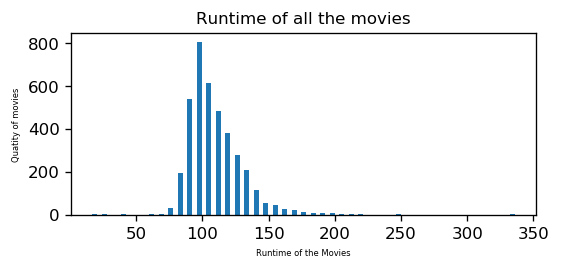

In [238]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(5,2), dpi = 120)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 5)
#On y-axis 
plt.ylabel('Quatity of movies', fontsize=5)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=10)

#histogram plot
plt.hist(tmdb_df['runtime'], rwidth = 0.5, bins =45)
#displays the plot
plt.show()

Most of the movies are timed between 80 to 115 minutes.

### Question 7 : In which year we had most number of profitable movies

In [239]:
#which year - highest profit
profits_year = tmdb_df.groupby('release_year')['profit'].sum()
profits_year.idxmax()

2015

Year 2015 was the year where movies made the highest profit.  
Next step is to find characteristics of profitable movies.  

We will be considering only profitable movies who have earned a significant amount of profit.  
Fixing amount is 100 million dollar.

In [240]:
#selecting the movies having profit 80M USD or more
profit_df = tmdb_df[tmdb_df['profit'] >= 100000000]

#reindexing new data
profit_df.index = range(len(profit_df))

#we will start from 1 instead of 0
profit_df.index = profit_df.index + 1

#printing the changed dataset
profit_df.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [241]:
#counting the number of rows in the new data base
len(profit_df)

826

### Question 8 : Successful genres

In [242]:
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_df[column].str.cat(sep = '|')
    
    #storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [243]:
count = data('genres')
count.head(10)

Action             317
Comedy             299
Adventure          278
Drama              264
Thriller           233
Family             166
Science Fiction    148
Fantasy            144
Romance            132
Crime              112
dtype: int64

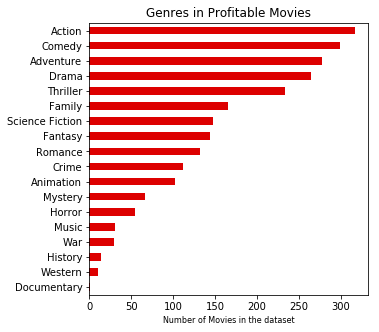

In [244]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#DD0000', fontsize = 10)

#title
lt.set(title = 'Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Number of Movies in the dataset', color = 'black', fontsize = '8')

#figure size(width, height)
lt.figure.set_size_inches(5, 5)

#ploting the graph
plt.show()

### Question 9 : Best Casts&Actors

In [245]:
count = data('cast')
#printing top 5 Casts
count.head()

Tom Cruise      23
Tom Hanks       19
Brad Pitt       18
Adam Sandler    17
Cameron Diaz    16
dtype: int64

### Question 10 : Average Profit of the movies

In [246]:
#New function to find average 
def profit_avg(column):
    return profit_df[column].mean()

In [247]:
# calling the above function
profit_avg('profit')

270858474.0435835

### Question 10 : Average duration of the movies

In [248]:
# calling the above function
profit_avg('runtime')

115.62832929782083

Movies which are having profit of 80M USD and more have an average duration of 115 minutes.

<a id='conclusions'></a>
## Conclusions
 
>**To be in defined successful criteria for a movie**  

-Average profit is around 271M USD  
-Average duration of the movie must be 116 minutes  
-Any one of these should be in the cast :Tom Cruise, Tom Hanks, Brad Pitt, Adam Sandler, Cameron Diaz.  
-Genres : Action, Comedy, Adventure, Drama, Thriller.  

***Limitations:***  
This analysis was done considering the movies which had a significant amount of profit of around 100M USD.   
A movie can increase the probability of a movie to become a hit by following these suggestions.  
We calculated and got these results regarding the data which is provided to us.  
There was no currency information regarding the movies. Different movies may have different currencies according to the country they are produce in and it may affect the results but we assumed all currencies as USD.  
Dropping the rows with missing values also affected the overall analysis.  

# References

1. Udacity videos and documents
2. https://pandas.pydata.org (Used for paramenters)
3. https://matplotlib.org (Used for designing graphics)